<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Credit Risk Assessment

### Credit Risk

**Credit Risk** can be defined as the probability or chance that someone or their counterparty will fail to honor their previous agreement, resulting in financial loss to banking institutions when the client *defaults* on the aforementioned agreement<sup><a href="https://www.risk-officer.com/Credit_Risk.htm">1</a>,</sup><sup><a href="https://www.investopedia.com/terms/c/creditrisk.asp">2</a></sup>. Usually, this occurs because of the inability of clients to repay their loans to said institutions.

<p align=center>
<img src="img/credit_risk.jpg" width="40%"><br>
<i><sup>Image credits: storyset @ <a href="https://www.freepik.com/author/stories">freepik</a>.</sup></i>
</p>

Although it may be impossible to predict exactly which clients will incur money loss for the company, ***Credit Risk Management*** refers exactly to the evaluation of this probability. That is, trying to identify which clients will default on their agreements. This is especially important for **Credit Risk Management** strategies, as it will allow the companies to mitigate money loss, for example, by increasing the interest rates for clients who represent higher risks or by even denying loans<sup><a href="https://www.risk-officer.com/Credit_Risk.htm">1</a>,</sup><sup><a href="https://www.investopedia.com/terms/c/creditrisk.asp">2</a></sup>.

One of the strategies used by lenders to evaluate risk are the *5 Cs of Credit*. Although companies have different ways of measuring these, they offer some insights about the risk of financial loss. The 5 Cs are: **Character**, as in the client's credit history; **Capital**, as in the amount of money they have; **Capacity**, or the debt-to-income ratio; **Collateral**, assets that can back or act as security for the loan; and **Conditions**, as in that is the purpose, amount and rates of the loan<sup><a href="https://www.investopedia.com/terms/f/five-c-credit.asp">3</a></sup>.

However, these are only a few characteristics that can be observed. The companies usually have a lot more information about their clients. Using Machine Learning methods, we can leverage this information, and with it try and predict if they will default or not.

### Goal

The goal of the present analysis is to predict if a bank client will default on their financial agreements with the lending institution or not. This evaluation has to happen before the client takes a loan or a credit card. This prediction needs to minimize false positives — to not negatively impact the clients — but also to prevent money loss on the company's side.

### Initial hypotheses 

There are a few initial hypotheses that we can think of.

* Clients with previously recorded bankruptcies will be more likely to default.

* Clients with previously recorded defaults will be more likely to default again.

* Clients with lower credit scores will also be more likely to default.

On the course of this analysis, we will see how these characteristics will impact on the outcome observed.

## About the dataset

In this notebook, we will use a dataset from a Data Science project that was part of a competition held by [Nubank](https://blog.nubank.com.br/nubank-o-que-e/), a digital financial platform from Brazil. The dataset presents several pieces of information about Nubank's clients and whether they defaulted on their financial obligations or not.

In the dataset, we find several columns:

* `ids` = These are the clients' IDs. This column is anonymised. 
* `target_default` = Whether the client defaulted or not. This will be our target variable.
* `score_1` = Credit Score. This column is anonymised.
* `score_2` = Another type of Credit Score. This is also anonymised.
* `score_3` = A third type of Credit Score. Contains the actual numbers.
* `score_4` = A fourth type of Credit Score. Contains the actual numbers.
* `score_5` = A fifth type of Credit Score. Contains the actual numbers.
* `score_6` = A sixth type of Credit Score. Contains the actual numbers.
* `risk_rate` = Unclear. Could be "Interest Rate Risk", which is defined as "the danger that a bank may incur loss or lose money in granting loans (...)".<sup><a href="https://www.sciencedirect.com/topics/economics-econometrics-and-finance/interest-rate-risk">4</a></sup>
* `last_amount_borrowed` = Last amount borrowed by the client.
* `last_borrowed_in_months` = How many months since the last loan.
* `credit_limit` = Limit of credit.
* `reason` = Unclear. This could be the reason for the loan. This is also anonymised.
* `income` = The client's income, probably annual income. 
* `facebook_profile` = If the client has a facebook profile.
* `state` = Geographical state. This is also anonymised.
* `zip` = Zip code. This is also anonymised.
* `channel` = Unclear. This is also anonymised.
* `job_name` = The client's job title. This is also anonymised.
* `real_state` = Unclear. This is also anonymised.
* `ok_since` = Unclear. This is probably a time variable.
* `n_bankruptcies` = Number of previous bankruptcies.
* `n_defaulted_loans` = Number of previous defaulted loans.
* `n_accounts` = Number of accounts.
* `n_issues` = Number of issues.
* `application_time_applied` = The time the application was made.
* `application_time_in_funnel` = How long the application was in "funnel".
* `email` = The client's e-mail provider.
* `external_data_provider_credit_checks_last_2_year` = External data. Credit checks in the last 2 years.
* `external_data_provider_credit_checks_last_month` = External data. Credit checks in the last month.
* `external_data_provider_credit_checks_last_year` = External data. Credit checks in the last year.
* `external_data_provider_email_seen_before` = External data. Unclear. Probably how many times the e-mail was seen previously.
* `external_data_provider_first_name` = External data. First name, unsure if from provider or client. We'll check this information based on the number of unique values.
* `external_data_provider_fraud_score` = External data. Fraud score.
* `lat_lon` = Latitude and Longitude of the client.
* `marketing_channel` = Marketing channel through which the client decided on a loan.
* `profile_phone_number` = Client's phone number. Looks anonymised.
* `reported_income` = Client's reported income.
* `shipping_state` = Country state for shipping to the client.
* `shipping_zip_code` = Zip code for shipping to the client. Looks anonymised.
* `profile_tags` = Dictionary of tags for each client. Unclear to what it means.
* `user_agent` = Information about which platform was used by the client (navigator, operating system, et cetera).
* `target_fraud` = Fraud information for another analysis in the same dataset.

## Importing data

Let's start our analysis by importing our dependencies, setting some parameters and reading our dataset. We will also print the first few entries of the data.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tools as mytools

# Options
pd.set_option('display.max_columns', None)

# The Moon also rises
np.random.seed(6327)

# Defining plot parameters
# plt.style.use('dark_background')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'

# Reading dataframe
df = pd.read_csv("data/acquisition_train.csv")

# ML libraries
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Checking size and first entries
print(df.shape)
df.head(3)

(45000, 43)


,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN


In [3]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


### The first look

As we can see, some of our columns are censored or anonymised. These include columns `score_1` and `score_2` and some clients' personal information such as `reason` and those related to their addresses and occupations.

However, there are coordinates which have been provided for each client (`lat_lon` variable). Whether these relate to their living location or the place where they contacted the bank for their loan* is unclear, although the latter may be more likely. Whatever the case, we can extract location information from this. However, we already have a `shipping_state` variable with location information.

<sup><sub>*_**Observation**: We do not know if the service acquired by the clients here was an actual loan or credit card service. Either way, these represent the bank "lending" money to the client. Thus, from now on in this notebook, we will refer to this contract made between both parties as a **loan** for the client._</sub></sup>

We have two variables with the client's income. One, `income`, is probably derived from the money received in the account and the other, `reported_income`, is likely the income the client has reported when creating the account. These values do not match but are likely correlated. If they are correlated, this could be redundant to our model.

Although `target_fraud` is not our target column for this analysis, it might provide some information for our model if the entry was subject to fraud before or not.

In addition, the variable `external_data_provider_email_seen_before` has -999 as its lowest value, and will be replaced by NaNs.

In [4]:
# Fixing -999s
df.external_data_provider_email_seen_before = df.external_data_provider_email_seen_before.replace(-999, np.nan)
df.external_data_provider_email_seen_before.describe()

count    42121.000000
mean        28.048456
std         17.939836
min         -1.000000
25%         12.000000
50%         28.000000
75%         44.000000
max         59.000000
Name: external_data_provider_email_seen_before, dtype: float64

We can see that the variable still has -1 data points. If this is count data from the e-mail, it can't have negative values. We will change these -1s to NaN as well.

In [5]:
# Fixing -999s
df.external_data_provider_email_seen_before = df.external_data_provider_email_seen_before.replace(-1, np.nan)
df.external_data_provider_email_seen_before.describe()

count    41474.000000
mean        28.501615
std         17.705628
min          0.000000
25%         13.000000
50%         28.000000
75%         44.000000
max         59.000000
Name: external_data_provider_email_seen_before, dtype: float64

Now it looks "correct".


## Dealing with categorical data

Let us check our column types and empty values.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

We have many columns with empty values, which will investigate further.

In [7]:
# Before proceeding, get column types
num_cols, bcat_cols, mcat_cols = mytools.classifyColumns(df)

<sup><sub>Observation: The `mytools` module is a collection of functions I wrote or gathered along the way while building my projects. They can be checked in the `tools.py` file in this same folder.</sub></sup>

The `target_default` column has some empty values. Let's see our value counts for it.

In [8]:
# Checking target column null values percentagem
df.target_default.isna().value_counts()/df.shape[0]*100

False    92.757778
True      7.242222
Name: target_default, dtype: float64

To aid in our following analysis, we will go ahead and drop these rows.

In [9]:
# Creating another df 
df_clean = df.copy()

# Since there are only a few empty values in our target variable, we drop the rows without the information
df_clean.dropna(subset=['target_default'], inplace=True)

Let's check our unique values per column in our categorical variables.

In [10]:
# Binary columns
mytools.uniqueValuesPerColumn(df_clean[bcat_cols])

,Variable,Unique values,Categories,NaNs
0,channel,NCqL3QBx0pscDnx3ixKwXg==,1,0


The column `channel` seem to contain only one value. We'll also drop this column, as it is non-informative.

In [11]:
# Multiple categories columns
mytools.uniqueValuesPerColumn(df_clean[mcat_cols])

,Variable,Unique values,Categories,NaNs
0,ids,"343b7e7b-2cf8-e508-b8fd-0a0285af30aa, bc2c7502...",41741,0
1,target_default,"False, True",2,0
2,score_1,"1Rk8w4Ucd5yR3KcqZzLdow==, DGCQep2AE5QRkNCshIAl...",7,0
3,score_2,"IOVu8au3ISbo6+zmfnYwMg==, SaamrHMo23l/3TwXOWgV...",35,0
4,reason,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,14261,4
5,facebook_profile,"True, False, nan",3,4153
6,state,"sjJbkqJS7cXalHLBFA+EOQ==, xsd3ZdsI3356I3xMxZei...",50,0
7,zip,"Ernn+uVXCMq/6ARrBCcd+A==, rlWIXTBO+VOa34+SpGyh...",823,0
8,job_name,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,30544,2617
9,real_state,"N5/CE7lSkAfB04hVFFwllw==, n+xK9CfX0bCn77lClTWv...",5,0


### Removing non-informative data

The `ids` column contains _only_ unique values, and thus will not be informative to our model later on. The `profile_phone_number` behaves in the same way. The `target_fraud` column values are unclear and represent way too many empty values, so we will drop these columns.

The variables `job_name` and `external_data_provider_first_name` have too many unique values and seem non-informative and will be removed.

`state` and `zip` do not look like they correspond to actual addresses and seem non-informative as well. Column `shipping_state` is unclear and seems non-informative. They will also be removed.

The `reason` column seems to be why the loan was taken, and only has 4 missing values. However, over 14,000 unique values seem non-informative as well. If this column was not censored, we could probably look at the messy data and coalesce common reasons for loans, which could help the model. Thus, we will also drop this column.

We could extract location information from the `lat_lon` variable but would lose more observations in the dataset due to the `1262` missing values it has. Besides, with the amount of entries in our dataset, this would take too long.

Column `application_time_applied` could be _"binned"_ into "hour of the day" to provide more concise information. However, this column seems to contain invalid time data. As we are unclear about the contents, we will drop this column too.

In [12]:
# Checking time column
df_clean.application_time_applied

0        07:52:34
1        02:34:29
2        00:60:02
3        11:20:49
4        13:39:03
           ...   
44995    13:27:39
44996    22:50:49
44997    09:60:49
44998    02:18:51
44999    15:01:57
Name: application_time_applied, Length: 41741, dtype: object

In [13]:
# Cleaning
df_clean.drop(['ids', 'profile_phone_number', 'channel', 'target_fraud',
               'job_name', 'external_data_provider_first_name', 'state',
               'zip', 'reason', 'lat_lon', 'application_time_applied',
               'shipping_state'], axis=1, inplace=True)

In [14]:
# Before proceeding, get column types again
num_cols, bcat_cols, mcat_cols = mytools.classifyColumns(df_clean)

Here is the remaining columns we have to deal with:

In [15]:
# Checking columns again
mytools.uniqueValuesPerColumn(df_clean[mcat_cols])

,Variable,Unique values,Categories,NaNs
0,score_1,"1Rk8w4Ucd5yR3KcqZzLdow==, DGCQep2AE5QRkNCshIAl...",7,0
1,score_2,"IOVu8au3ISbo6+zmfnYwMg==, SaamrHMo23l/3TwXOWgV...",35,0
2,facebook_profile,"True, False, nan",3,4153
3,real_state,"N5/CE7lSkAfB04hVFFwllw==, n+xK9CfX0bCn77lClTWv...",5,0
4,email,"outlook.com, gmail.com, spgov.com, hotmail.com...",6,0
5,marketing_channel,"Invite-email, Radio-commercial, Waiting-list, ...",10,3308
6,profile_tags,"{'tags': ['n19', 'n8']}, {'tags': ['n6', 'n7',...",24458,0
7,user_agent,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,298,656


### Inputing missing categorical data

The columns `facebook_profile` and `marketing_channel` look like optional columns and thus may not have been informed by the client. It is reasonable to impute the empty values in this scenario with the most commonly found value in each respective column.

<sup><sub>Note: Another reasonable action for the `marketing_channel` column would be to just use a category termed _"none"_ or _"other"_, as it could mean that these clients reached the negotiation channel without  being targeted by any of the previously listed marketing strategies.</sub></sup>

In [16]:
# Value counts for the facebook_profile column
df_clean.facebook_profile.value_counts()

False    23653
True     13935
Name: facebook_profile, dtype: int64

In [17]:
# Value counts for the marketing_channel column
df_clean.marketing_channel.value_counts()

Website             10163
Waiting-list         6491
Invite-web           3247
Radio-commercial     3145
Facebook             3109
LinkedIn             3083
Instagram            3077
Twitter              3070
Invite-email         3048
Name: marketing_channel, dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

# Replacing empty values in categorical variables
vars = ['facebook_profile', 'marketing_channel']
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,vars])
df_clean.loc[:,vars] = imputer.transform(df_clean.loc[:,vars])

C:\Users\imuno\AppData\Local\Temp\ipykernel_19888\58105084.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean.loc[:,vars] = imputer.transform(df_clean.loc[:,vars])


In [19]:
# Checking columns again
mytools.uniqueValuesPerColumn(df_clean[mcat_cols])

,Variable,Unique values,Categories,NaNs
0,score_1,"1Rk8w4Ucd5yR3KcqZzLdow==, DGCQep2AE5QRkNCshIAl...",7,0
1,score_2,"IOVu8au3ISbo6+zmfnYwMg==, SaamrHMo23l/3TwXOWgV...",35,0
2,facebook_profile,"True, False",2,0
3,real_state,"N5/CE7lSkAfB04hVFFwllw==, n+xK9CfX0bCn77lClTWv...",5,0
4,email,"outlook.com, gmail.com, spgov.com, hotmail.com...",6,0
5,marketing_channel,"Invite-email, Radio-commercial, Waiting-list, ...",9,0
6,profile_tags,"{'tags': ['n19', 'n8']}, {'tags': ['n6', 'n7',...",24458,0
7,user_agent,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,298,656


In [20]:
# Checking e-mail column
df_clean.email.value_counts()

gmail.com       21034
hotmail.com     10502
outlook.com      5419
spgov.com        4782
hotmaill.com        3
gmaill.com          1
Name: email, dtype: int64

In [21]:
# Removing typos
df_clean.email = df_clean.email.replace('hotmaill.com', 'hotmail.com')
df_clean.email = df_clean.email.replace('gmaill.com', 'gmail.com')

### Feature engineering

The `profile_tags` can be converted to individual columns with each tag. They do not seem to mean anything at first sight but could mean something to the bank.

The `user_agent` seems to have information on which device was used to contact the bank.

In [22]:
## Converting tags to individual columns

# First, create another df and evaluate the column to a dict
tags_df = pd.json_normalize(df_clean['profile_tags'].map(eval))
tags_df.index = df_clean.index

# Create another column to preserve the order of rows
tags_df['id'] = tags_df.index

# Check df
tags_df.head()

,tags,id
0,"[n19, n8]",0
1,"[n6, n7, nim]",1
2,"[n0, n17, nim, da]",2
3,[n4],3
4,"[pro+aty, n19, da, b19]",4


In [23]:
# Explode tags into individual values for each row
tags_df = tags_df.explode('tags')

# Counting each occurrence for each row
tags_count = pd.crosstab(tags_df['id'], tags_df['tags'])
tags_count.head()

tags,a15,aty,b19,c1,c55,da,dfa,n0,n1,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n2,n3,n4,n5,n6,n7,n8,n9,nim,pro+aty
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [24]:
# Checking if indexes match
(tags_count.index==df_clean.index).all()

True

In [25]:
# Joining two dataframes
df_clean = pd.concat([df_clean, tags_count.astype(str)], axis=1)
df_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_zip_code,profile_tags,user_agent,a15,aty,b19,c1,c55,da,dfa,n0,n1,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n2,n3,n4,n5,n6,n7,n8,n9,nim,pro+aty
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,True,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,444,outlook.com,NaN,2,0.0,51.0,645,Invite-email,57849.0,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,False,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346,gmail.com,0.0,1,0.0,17.0,243,Radio-commercial,4902.0,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,65023.65,False,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,6,gmail.com,NaN,2,NaN,9.0,65,Waiting-list,163679.0,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,68830.01,False,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,406,spgov.com,NaN,3,NaN,38.0,815,Waiting-list,1086.0,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,60011.29,True,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,240,gmail.com,0.0,2,1.0,46.0,320,Invite-email,198618.0,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


Our columns appear to match the `profile_tags` data, therefore we will exclude the old column.

In [26]:
# Cleaning
df_clean.drop(['profile_tags'], axis=1, inplace=True)

Now it is time to deal with the `user_agent` data. Let us look at the entries:

In [27]:
with pd.option_context("display.max_rows", 1000, "display.max_colwidth", 200):
    print(pd.DataFrame(df.user_agent.value_counts().head(16)))

                                                                                                                                                         user_agent
Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41020c Build/LRX22G) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/34.0.1847.118 Safari/537.362         195
Mozilla/5.0 (Linux; Android 7.0; Pixel C Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.369                190
Mozilla/5.0 (Linux; Android 7.0; Pixel C Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.363                189
Mozilla/5.0 (Linux; Android 7.0; SM-T827R4 Build/NRD90M) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.116 Safari/537.368                             189
Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Build/32.2.A.0.253; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.364         187
Mozilla/5.0 (X11

In the beginning, we can find information about the device used to access and the operational system (OS). We can build a regex search to extract this information. However, we will not have the device model for every entry as only Android specifies it. Instead, we will retrieve generic information about the type of system used. I wrote a wrapper function around the functionality of the `python_user_agent` package to do this job.

In [28]:
# Only a few empty values so let's delete them
df_clean.dropna(subset=['user_agent'], inplace=True)

In [29]:
# Retrieving user_agent info
df_clean = mytools.userAgentInfo(df_clean, 'user_agent')

In [30]:
df_clean

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_zip_code,user_agent,a15,aty,b19,c1,c55,da,dfa,n0,n1,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n2,n3,n4,n5,n6,n7,n8,n9,nim,pro+aty,ua_browser,ua_os,ua_device,ua_device_brand,ua_is_mobile,ua_is_tablet,ua_is_pc
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,True,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,444,outlook.com,NaN,2,0.0,51.0,645,Invite-email,57849.0,17528,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,Chrome Mobile WebView,Android,SGP771,Sony,True,True,False
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,False,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,346,gmail.com,0.0,1,0.0,17.0,243,Radio-commercial,4902.0,40933,Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,Samsung Internet,Android,Samsung SM-T550,Samsung,False,True,False
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,65023.65,False,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,6,gmail.com,NaN,2,NaN,9.0,65,Waiting-list,163679.0,50985,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,Chrome Mobile WebView,Android,SGP771,Sony,True,True,False
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,68830.01,False,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,406,spgov.com,NaN,3,NaN,38.0,815,Waiting-list,1086.0,37825,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Chrome Mobile WebView,Android,HTC One X10,HTC,True,False,False
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,60011.29,True,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,240,gmail.com,0.0,2,1.0,46.0,320,Invite-email,198618.0,52827,Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,Chrome Mobile WebView,Android,Pixel C,Google,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,36.0,10627.0,100013.24,False,N5/CE7lSkAfB04hVFFwllw==,37.0,0.0,0.0,7.0,7.0,72,hotmail.com,0.0,2,1.0,7.0,730,Facebook,73417.0,52148,Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Chrome Mobile,Android,Samsung SM-G920V,Samsung,True,False,False
44996,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,NaN,36262.0,95026.69,False,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,16.0,16.0,51,gmail.com,NaN,1,NaN,1.0,28,Waiting-list,26246.0,46084,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Chrome,Chrome OS,Other,None,False,False,True
44997,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,NaN,0.0,106020.90,False,nSpvDsIsslUaX6GE6m6eQA==,7.0,0.0,0.

In [31]:
# Checking entries
df_clean.iloc[:,-7:].head()

,ua_browser,ua_os,ua_device,ua_device_brand,ua_is_mobile,ua_is_tablet,ua_is_pc
0,Chrome Mobile WebView,Android,SGP771,Sony,True,True,False
1,Samsung Internet,Android,Samsung SM-T550,Samsung,False,True,False
2,Chrome Mobile WebView,Android,SGP771,Sony,True,True,False
3,Chrome Mobile WebView,Android,HTC One X10,HTC,True,False,False
4,Chrome Mobile WebView,Android,Pixel C,Google,True,True,False


In [32]:
# Let's get rid of the user_agent original column and other columns
df_clean.drop(['user_agent', 'ua_device', 'ua_browser'], axis=1, inplace=True)

In [33]:
# Before proceeding, get column types again
num_cols, bcat_cols, mcat_cols = mytools.classifyColumns(df_clean)

# Checking columns again
mytools.uniqueValuesPerColumn(df_clean[mcat_cols])

,Variable,Unique values,Categories,NaNs
0,score_1,"1Rk8w4Ucd5yR3KcqZzLdow==, DGCQep2AE5QRkNCshIAl...",7,0
1,score_2,"IOVu8au3ISbo6+zmfnYwMg==, SaamrHMo23l/3TwXOWgV...",35,0
2,real_state,"N5/CE7lSkAfB04hVFFwllw==, n+xK9CfX0bCn77lClTWv...",5,0
3,email,"outlook.com, gmail.com, spgov.com, hotmail.com",4,0
4,marketing_channel,"Invite-email, Radio-commercial, Waiting-list, ...",9,0
5,a15,"0, 1, 2",3,0
6,aty,"0, 1, 2",3,0
7,b19,"0, 1, 2, 3",4,0
8,c55,"0, 1, 2, 3",4,0
9,da,"0, 1, 2, 3",4,0


In [34]:
# Checking binary columns again
mytools.uniqueValuesPerColumn(df_clean[bcat_cols])

,Variable,Unique values,Categories,NaNs
0,target_default,"False, True",2,0
1,c1,"0, 1",2,0
2,n0,"0, 1",2,0
3,n1,"0, 1",2,0
4,n10,"0, 1",2,0
5,n11,"0, 1",2,0
6,n12,"0, 1",2,0
7,n13,"0, 1",2,0
8,n14,"0, 1",2,0
9,n15,"0, 1",2,0


## Dealing with numeric data

Now, we will look at the numeric columns in our dataset.

In [35]:
# Checking first entries.
df_clean[num_cols].iloc[:,0:22].head()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,NaN,0.0,0.0,18.0,18.0,444,NaN,2,0.0,51.0,645,57849.0,17528
1,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,100018.91,50.0,0.0,0.0,14.0,14.0,346,0.0,1,0.0,17.0,243,4902.0,40933
2,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,65023.65,NaN,0.0,0.0,10.0,NaN,6,NaN,2,NaN,9.0,65,163679.0,50985
3,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,68830.01,NaN,1.0,0.0,19.0,19.0,406,NaN,3,NaN,38.0,815,1086.0,37825
4,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,60011.29,NaN,0.0,0.0,11.0,NaN,240,0.0,2,1.0,46.0,320,198618.0,52827


In [36]:
# Checking numeric columns
mytools.uniqueValuesPerColumn(df_clean[num_cols].iloc[:,0:22])

,Variable,Unique values,Categories,NaNs
0,score_3,"350.0, 370.0, 360.0, 510.0, 500.0, 300.0, 250....",87,0
1,score_4,"101.800831713, 97.0626153138, 100.027072525, 1...",41085,0
2,score_5,"0.259554667831, 0.942654520464, 0.351917595299...",41085,0
3,score_6,"108.427272823, 92.002545526, 112.892452948, 94...",41085,0
4,risk_rate,"0.4, 0.24, 0.29, 0.32, 0.18, 0.44, 0.43, 0.33,...",81,0
5,last_amount_borrowed,"25033.92, nan, 7207.92, 5019.53, 7524.9, 20034...",13277,27174
6,last_borrowed_in_months,"36.0, nan, 60.0",3,27174
7,credit_limit,"0.0, 39726.0, nan, 54591.0, 61055.0, 42666.0, ...",19107,12887
8,income,"65014.12, 100018.91, 65023.65, 68830.01, 60011...",38255,0
9,ok_since,"nan, 50.0, 11.0, 35.0, 16.0, 19.0, 23.0, 43.0,...",100,24080


In [37]:
# Checking summary
df_clean[num_cols].iloc[:,0:22].describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,41085.000000,41085.000000,41085.000000,41085.000000,41085.000000,13911.000000,13911.000000,28198.000000,4.108500e+04,17005.000000,40953.000000,41073.000000,41085.000000,30341.000000,41085.000000,20399.0,41085.000000,27281.000000,37867.000000,41085.000000,41085.0,41085.000000
mean,346.491907,100.007088,0.499434,99.919927,0.294565,13320.242985,40.582273,33854.191077,7.109676e+04,35.174772,0.076869,0.004602,10.635414,11.016974,247.814141,0.0,1.504929,0.503317,28.456281,500.379579,inf,33901.092442
std,110.160494,3.181303,0.288094,10.026968,0.101564,7925.847357,9.433118,36133.109320,5.241961e+04,21.623677,0.275223,0.080193,4.580684,4.590187,146.419733,0.0,1.113969,0.499998,17.716520,288.061125,NaN,12696.821357
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,403.0,12001.000000
25%,270.000000,97.864991,0.251607,93.184756,0.220000,7206.055000,36.000000,9999.000000,4.402151e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,13.000000,252.000000,50909.0,22899.000000
50%,340.000000,100.021020,0.500219,99.979525,0.290000,12010.470000,36.000000,25179.500000,6.004454e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,28.000000,502.000000,101626.0,33878.000000
75%,420.000000,102.138975,0.747656,106.630297,0.360000,18029.515000,36.000000,46449.750000,8.503268e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,44.000000,747.000000,151250.0,44911.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,55998.000000


The column `ok_since` has unclear content and many missing values. The column `shipping_zip_code`, which should be a categorical variable, appears here without actual zip codes. The column `external_data_provider_credit_checks_last_2_year` does not seem to contain valid information, as it only contains NaN or zeroes. The column `external_data_provider_email_seen_before` has unclear content. These columns will be removed.

In [38]:
# Cleaning data
df_clean.drop(['ok_since', 'shipping_zip_code', 'external_data_provider_credit_checks_last_2_year', 'external_data_provider_email_seen_before'], axis=1, inplace=True)

The column `reported_income` has *infinity* values (`inf`) which should be replaced.

In [39]:
# Replacing infinity values with NaN
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

### Inputing missing data

Both `last_amount_borrowed` and `last_borrowed_in_months` present a high number of NaN values. It seems reasonable to assume that if the value is empty, that no value was borrowed within the mentioned period, so we will replace these NaNs with zeroes. The same reasoning goes for `credit_limit` (empty value meaning client has no credit), `n_bankruptcies`, `n_defaulted_loans` and `n_issues` (empty value meaning no bankruptcies, defaulted loans or issues).

The column `external_data_provider_credit_checks_last_year` seems to contain information about wether or not credit checks were made in the last year (0 or 1 values). Thus, it seems reasonable to input missing data with zeroes, too.

In [40]:
# Defining columns
fill_with_zeroes = ['last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'n_issues',
                    'n_bankruptcies', 'n_defaulted_loans', 'external_data_provider_credit_checks_last_year']

# Filling NaNs with zeroes
for col in fill_with_zeroes:
    df_clean[col].fillna(value=0, inplace=True)

The only columns left to deal with are `reported_income` and `external_data_provider_email_seen_before`. Due to the amount of missing values (3218) and the hard-to-understand nature of the way the latter variable is coded, and the fact that we now have missing reported incomes, we will inpute the missing values with the median value as it is a good measure to describe these data.

In [41]:
# Writing column
fill_with_median = ['reported_income']

# Imputing NaNs with median
for col in fill_with_median:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

So if we look at our dataset again:

In [42]:
# Checking our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41085 entries, 0 to 44999
Data columns (total 59 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41085 non-null  object 
 1   score_1                                          41085 non-null  object 
 2   score_2                                          41085 non-null  object 
 3   score_3                                          41085 non-null  float64
 4   score_4                                          41085 non-null  float64
 5   score_5                                          41085 non-null  float64
 6   score_6                                          41085 non-null  float64
 7   risk_rate                                        41085 non-null  float64
 8   last_amount_borrowed                             41085 non-null  float64
 9   last_borrowed_in_months     

One last thing to check: correlation between incomes.

In [43]:
# Checking correlation between incomes
import scipy as sp
sp.stats.spearmanr(df_clean.income, df_clean.reported_income)

SignificanceResult(statistic=0.002054732455738625, pvalue=0.6770658007955552)

Since they do not correlate, we will keep both variables in our dataset as they might provide important information. Now, we have no missing values and are ready to follow-up with our analyses!

## Assessing Credit Risk

### Metrics evaluation

We have four main metrics we can analyse here. 

**Accuracy** represents how many times our model as correct under all prections that it tried.

**Precision** reflects our model's ability to avoid classifying a customer who will pay their loan as someone who will actually default.

The **recall**, or sensitivity, is the ability to identify all true positive cases, i.e., labelling customers that will default their agreement as such.

The **AUC** represents the area under a ROC curve. A ROC curve plots the *Sensitivity* (true positives rate) against *1 - Specificity* (false positives rate). The higher the area under the curve (i.e. the closer to 1 the value is), the closer is the probability that we are assigning our classes correctly.

In our scenario, it seems more reasonable to be concerned with clients who will default their loan (represented by **recall**), as this will incur money loss to the bank. However, for a good customer experience, maximizing **precision** would benefit the bank as well, as clients who successfully pay their loans will also generate revenue for the company.

For this preliminary evaluation, we will consider **recall** as our most important metric for following up, as this is more important. From [a previous analysis we did before](../project_ccfraud/cc_fraud_analysis.ipynb), we know that class imbalance actually affects our recall rates, so we are going to use a method called _Random Under Sampling_ to balance our dataset. We will also consider the ROC AUC and precision secondarily to choose our model.

## Testing with PyCaret


In [44]:
## Preparing our columns

# Fixing boolean column
df_clean.facebook_profile = df_clean.facebook_profile.astype(str)

# Classifying columns with the function before enconding
num_cols, bcat_cols, mcat_cols = mytools.classifyColumns(df_clean)

In [45]:
# Copying df for backup
df_enc = df_clean.copy()

# Using LabelEncoder to code binary variables
le = LabelEncoder()
for col in bcat_cols:
    df_enc[col] = le.fit_transform(df_enc[col])

# Now getting dummies for categorical variables
df_enc = pd.get_dummies(df_enc, columns=mcat_cols)

# Checking resulting dataframe
df_enc.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_fraud_score,reported_income,c1,n0,n1,n10,n11,n12,n13,n14,n15,n16,n17,n18,n19,n2,n3,n4,n5,n6,n7,n8,n9,ua_is_mobile,ua_is_tablet,ua_is_pc,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,score_2_+2hzpeP1RWr8PEvL1WTUdw==,score_2_+CxEO4w7jv3QPI/BQbyqAA==,score_2_/tdlnWjXoZ3OjdtBXzdOJQ==,score_2_5/uMrqKj3OL/Xk5OrGx9fg==,score_2_55UK234RR1d7HIWJjmq9tw==,score_2_6J1ZMTzN5GKHXnhM4J1JbA==,score_2_7h+tk4z7O9brtBSe1rNjxA==,score_2_7h8PTkrlTWUPP3yuyP4rUg==,score_2_A+QuW1n/ABeiVVe/9CRZ9Q==,score_2_Fv28Bz0YRTVAT5kl1bAV6g==,score_2_IOVu8au3ISbo6+zmfnYwMg==,score_2_LCak332j+TYFqHC3NDwiqg==,score_2_NLvAOzzmJba/0zolQnWF5Q==,score_2_O4i7FxcROACMVTCgI0WXuA==,score_2_OlDYtdljgSSYM/M1L2CRaQ==,score_2_RO7MTL+j4PH2gNzbhNTq/A==,score_2_SaamrHMo23l/3TwXOWgVzw==,score_2_YLGMUI9hObSh6wD/xfanGg==,score_2_bopP0NxW3+r8tn9xIHTaOw==,score_2_cdpgyOyZS04uXerMNu7uCw==,score_2_d/7Hedyz7ovK9Pn1CYN4+A==,score_2_dCm9hFKfdRm7ej3jW+gyxw==,score_2_dWJRASUFMejk3AHZ1p1Gkg==,score_2_emS9xH8CLoRNie2uSmaDAQ==,score_2_ky19q4V1ZqgL3jnHX0wKDw==,score_2_mX2VRRG38RPiHX+MfjefRw==,score_2_osCzpM4hJrxugqWWuZmMWw==,score_2_pAzpxkhjPsjWldgSX21+zg==,score_2_rJZgTmANW3PjOCQLCcp4iQ==,score_2_tHpS8e9F8d9zg3iOQM9tsA==,score_2_tQUTfUyeuGkhRotd+6WjVg==,score_2_vJyc9xom9v7hwFMPTIpmKw==,score_2_w1miZqhB5+RSamEQJa0rqg==,score_2_wjdj2vxjWoDsEIk0l09ynw==,score_2_wkeCdGeu5sEv4/fjwR0aDg==,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,email_gmail.com,email_hotmail.com,email_outlook.com,email_spgov.com,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,marketing_channel_Invite-web,marketing_channel_LinkedIn,marketing_channel_Radio-commercial,marketing_channel_Twitter,marketing_channel_Waiting-list,marketing_channel_Website,a15_0,a15_1,a15_2,aty_0,aty_1,aty_2,b19_0,b19_1,b19_2,b19_3,c55_0,c55_1,c55_2,c55_3,da_0,da_1,da_2,da_3,dfa_0,dfa_1,dfa_2,dfa_3,nim_0,nim_1,nim_2,nim_3,pro+aty_0,pro+aty_1,pro+aty_2,pro+aty_3,ua_os_Android,ua_os_Chrome OS,ua_os_Mac OS X,ua_os_Ubuntu,ua_os_Windows,ua_os_iOS,ua_device_brand_Amazon,ua_device_brand_Apple,ua_device_brand_Generic_Android,ua_device_brand_Generic_Android_Tablet,ua_device_brand_Google,ua_device_brand_HTC,ua_device_brand_Huawei,ua_device_brand_LG,ua_device_brand_Samsung,ua_device_brand_Sony,ua_device_brand_SonyEricsson
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,1,0.0,0.0,18.0,18.0,444,2,0.0,645,57849.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,0,0.0,0.0,14.0,14.0,346,1,0.0,243,4902.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,0.0,65023.65,0,0.0,0.0,10.0,0.0,6,2,0.0,65,163679.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1

In [46]:
## Splitting the dataset

# Creating test dataset
test = df_enc.sample(frac=0.25, random_state=6327)

# Creating train data by dropping test data
train = df_enc.drop(test.index)

# Resetting indexes
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [47]:
# Importing pycaret tools
from pycaret.classification import setup, compare_models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, interpret_model, finalize_model

# Defining RandomUnderSampler to deal with imbalance
rus = RandomUnderSampler()

#### Testing the model with feature selection

In [66]:
# Setting up classification models with feature selection
class_feat = setup(data=train,
                   target='target_default',
                   normalize=True,
                   normalize_method='zscore',
                   experiment_name='CreditRisk',
                   session_id=6327,
                   feature_selection=True,
                   fix_imbalance=True,
                   fix_imbalance_method=rus
                  )

,Description,Value
0,Session id,6327
1,Target,target_default
2,Target type,Binary
3,Original data shape,"(30814, 151)"
4,Transformed data shape,"(16171, 31)"
5,Transformed train set shape,"(6926, 31)"
6,Transformed test set shape,"(9245, 31)"
7,Numeric features,150
8,Preprocess,True
9,Imputation type,simple


In [67]:
best_feat = compare_models(sort='AUC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:19:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6552,0.7141,0.6555,0.2666,0.3790,0.1954,0.2334,0.4970
lda,Linear Discriminant Analysis,0.6554,0.7140,0.6566,0.2669,0.3795,0.1960,0.2342,0.0960
gbc,Gradient Boosting Classifier,0.6522,0.7121,0.6546,0.2645,0.3767,0.1919,0.2299,0.3140
ada,Ada Boost Classifier,0.6574,0.7067,0.6431,0.2657,0.3760,0.1926,0.2284,0.1380
lightgbm,Light Gradient Boosting Machine,0.6411,0.6944,0.6480,0.2559,0.3669,0.1776,0.2151,0.1450
rf,Random Forest Classifier,0.6443,0.6942,0.6393,0.2563,0.3659,0.1774,0.2132,0.1780
qda,Quadratic Discriminant Analysis,0.6399,0.6922,0.6211,0.2573,0.3589,0.1713,0.2042,0.0950
et,Extra Trees Classifier,0.6382,0.6903,0.6402,0.2526,0.3623,0.1715,0.2078,0.1490
nb,Naive Bayes,0.6502,0.6855,0.6021,0.2621,0.3579,0.1742,0.2051,0.3640
xgboost,Extreme Gradient Boosting,0.6160,0.6664,0.6145,0.2345,0.3394,0.1394,0.1716,0.1940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#### Testing the model without feature selection

In [68]:
# Setting up classification models without feature selection
class_nofeat = setup(data=train,
                   target='target_default',
                   normalize=True,
                   normalize_method='zscore',
                   experiment_name='CreditRisk',
                   session_id=6327,
                   feature_selection=False,
                   fix_imbalance=True,
                   fix_imbalance_method=rus
                  )

best_nofeat = compare_models(sort='AUC')

,Description,Value
0,Session id,6327
1,Target,target_default
2,Target type,Binary
3,Original data shape,"(30814, 151)"
4,Transformed data shape,"(16171, 151)"
5,Transformed train set shape,"(6926, 151)"
6,Transformed test set shape,"(9245, 151)"
7,Numeric features,150
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6566,0.7180,0.6630,0.2691,0.3828,0.2000,0.2391,0.2990
lr,Logistic Regression,0.6624,0.7178,0.6511,0.2706,0.3823,0.2012,0.2380,0.0670
lda,Linear Discriminant Analysis,0.6620,0.7178,0.6488,0.2700,0.3812,0.1998,0.2364,0.0700
ada,Ada Boost Classifier,0.6640,0.7124,0.6439,0.2705,0.3809,0.2000,0.2356,0.1780
rf,Random Forest Classifier,0.6505,0.7036,0.6509,0.2626,0.3741,0.1885,0.2260,0.1290
lightgbm,Light Gradient Boosting Machine,0.6475,0.7022,0.6480,0.2601,0.3712,0.1843,0.2214,0.1100
et,Extra Trees Classifier,0.6431,0.6941,0.6428,0.2563,0.3664,0.1776,0.2141,0.1120
nb,Naive Bayes,0.8344,0.6935,0.1083,0.4396,0.1724,0.1167,0.1530,0.0530
xgboost,Extreme Gradient Boosting,0.6296,0.6797,0.6257,0.2445,0.3516,0.1569,0.1910,0.2390
dt,Decision Tree Classifier,0.5675,0.5731,0.5813,0.2035,0.3015,0.0835,0.1077,0.0770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In both cases, the _Gradient Boosting Classifier_ was our best model, with the model without feature selection performing slightly better and faster. We will proceed to tuning this model to see if we can improve our rates. But first, let's how our model performs with cross validation.

In [69]:
# Setting up classification models without feature selection
class_nofeat = setup(data=train,
                   target='target_default',
                   normalize=True,
                   normalize_method='zscore',
                   experiment_name='CreditRisk',
                   session_id=6327,
                   feature_selection=False,
                   fix_imbalance=True,
                   fix_imbalance_method=rus
                  )

,Description,Value
0,Session id,6327
1,Target,target_default
2,Target type,Binary
3,Original data shape,"(30814, 151)"
4,Transformed data shape,"(16171, 151)"
5,Transformed train set shape,"(6926, 151)"
6,Transformed test set shape,"(9245, 151)"
7,Numeric features,150
8,Preprocess,True
9,Imputation type,simple


In [70]:
# Creating GBC model with no feature selection
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6750,0.7490,0.6879,0.2864,0.4044,0.2300,0.2718
1,0.6481,0.7252,0.6908,0.2682,0.3864,0.2020,0.2465
2,0.6389,0.7104,0.6474,0.2543,0.3651,0.1751,0.2125
3,0.6541,0.7188,0.6590,0.2664,0.3794,0.1956,0.2342
4,0.6481,0.7049,0.6127,0.2533,0.3584,0.1700,0.2015
5,0.6477,0.6906,0.6358,0.2576,0.3667,0.1793,0.2144
6,0.6602,0.7311,0.6859,0.2761,0.3937,0.2132,0.2559
7,0.6708,0.7377,0.6974,0.2857,0.4054,0.2295,0.2732
8,0.6676,0.7225,0.6859,0.2813,0.3990,0.2213,0.2634


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
# Tuning model
tuned_gbc = tune_model(gbc, optimize='AUC', choose_better=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


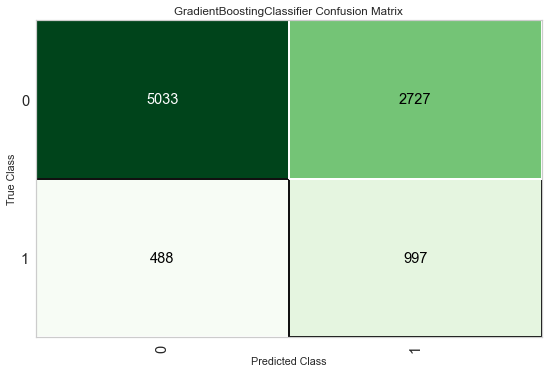

In [72]:
# Plotting confusion matrix
plot_model(tuned_gbc, 'confusion_matrix', scale=0.7)

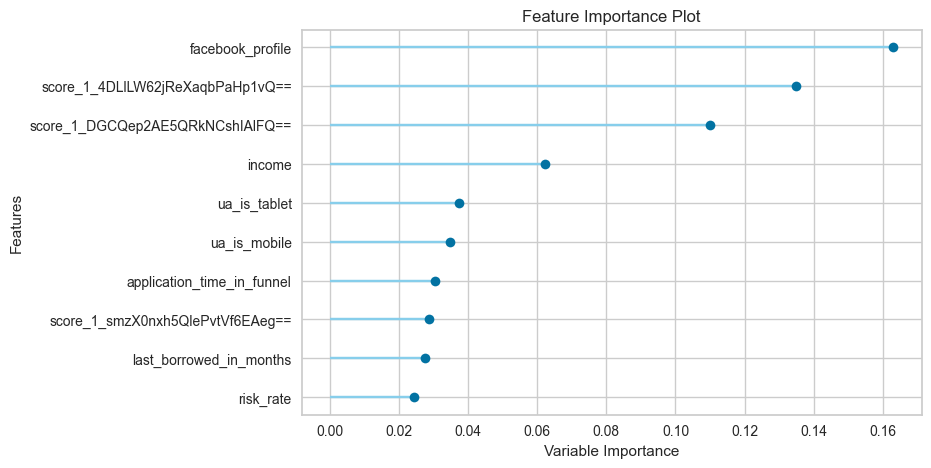

In [73]:
# Feature Importance plot
plot_model(tuned_gbc, 'feature')

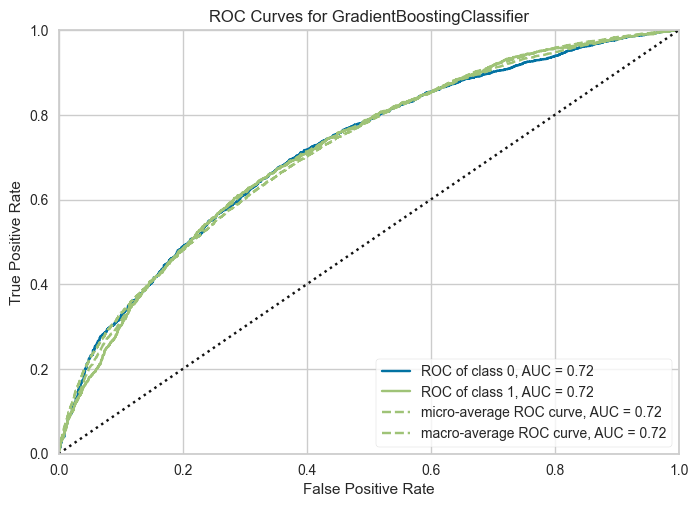

In [74]:
# Plotting AUC
plot_model(tuned_gbc, 'auc')

In [75]:
# Finalising model
final_gbc = finalize_model(tuned_gbc)

# Predicting within the model
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6615,0.7424,0.7044,0.2800,0.4007,0.2218,0.2677


,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,...,ua_device_brand_Google,ua_device_brand_HTC,ua_device_brand_Huawei,ua_device_brand_LG,ua_device_brand_Samsung,ua_device_brand_Sony,ua_device_brand_SonyEricsson,target_default,prediction_label,prediction_score
11944,410.0,100.643768,0.161476,94.579834,0.35,0.000000,0.0,43184.0,85014.632812,0,...,0,0,0,0,1,0,0,1,1,0.8464
2377,330.0,99.590614,0.849704,75.754204,0.34,0.000000,0.0,0.0,40023.949219,1,...,0,0,0,0,0,0,1,1,1,0.6601
86,160.0,99.356552,0.509084,91.170860,0.46,15014.139648,36.0,0.0,40021.468750,0,...,0,0,0,0,0,0,1,0,0,0.8319
29402,370.0,100.912415,0.666664,97.522774,0.33,0.000000,0.0,20676.0,88027.578125,0,...,0,0,0,0,0,1,0,0,1,0.5274
2481,300.0,97.328926,0.806478,94.988670,0.43,15016.070312,36.0,10226.0,60028.871094,0,...,0,0,1,0,0,0,0,0,0,0.7261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13974,520.0,100.799355,0.393686,113.916824,0.34,10425.620117,36.0,10813.0,80027.867188,0,...,0,0,0,0,0,0,0,1,1,0.5480
9743,180.0,101.452103,0.454872,97.327538,0.34,15014.750000,36.0,21894.0,58618.781250,0,...,0,0,0,1,0,0,0,0,0,0.7573
6448,400.0,101.664749,0.955198,101.435921,0.43,0.000000,0.0,40609.0,49031.160156,0,...,0,0,0,0,0,0,0,0,1,0.6212
12790,680.0,96.280113,0.297285,93.040787,0.44,0.000000,0.0,21589.0,40020.621094,0,...,0,0,0,0,0,0,0,0,1,0.6401


In [76]:
# Predicting on the test data
results_df = predict_model(final_gbc, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6592,0.7235,0.6697,0.2713,0.3862,0.2051,0.2452


## Testing through scikit pipeline

False    34493
True      6592
Name: target_default, dtype: int64

These defaults represent 16.0448% of the dataset.



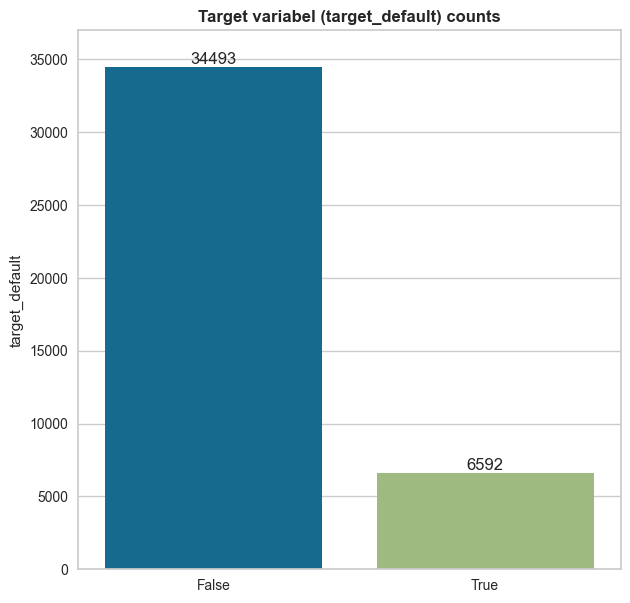

In [77]:
# Count target_default values
print(df_clean.target_default.value_counts())

# How much %? Does it match the number stated by the provider?
print('\nThese defaults represent {:.4f}% of the dataset.\n'.format((df_clean[df_clean.target_default == 1].shape[0] / df_clean.shape[0]) * 100))

# Plotting barplot
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x=df_clean.target_default.unique(), y=df_clean.target_default.value_counts(), data=df_clean, ax=ax)
ax.set_title('Target variabel (target_default) counts', fontsize=12, weight='bold')
ax = plt.gca()
ax.set_ylim([0, 37000])
ax.bar_label(ax.containers[0]);

In [78]:
# First, importing libraries
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

0    4944
1    4944
Name: target_default, dtype: int64


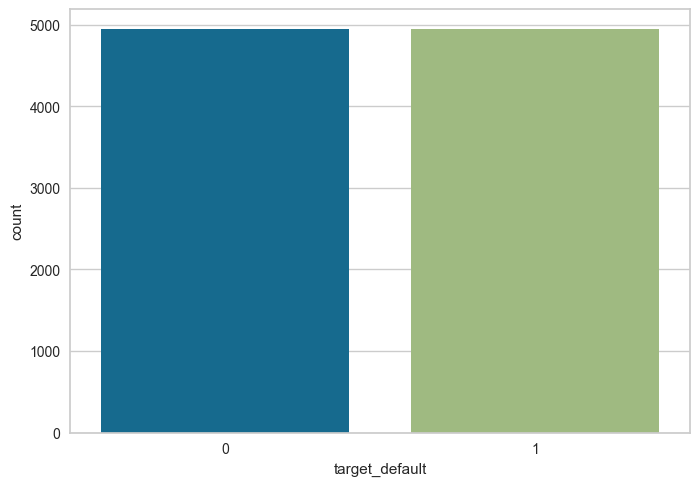

In [79]:
## Preparing our columns

# Scaling values
df_scale = df_enc
df_scale[num_cols] = StandardScaler().fit_transform(df_scale[num_cols].values)

# Splitting the dataset

# Extracting target from dataset
X = df_scale.drop('target_default', axis=1)
y = df_scale['target_default']

# Separating train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=6327, test_size = 0.25)

# Defining random under sampler
rus = RandomUnderSampler(random_state=6327)

# Creating new train sets
X_under, y_under = rus.fit_resample(X_train, y_train)

# Checking the balancing
print(y_under.value_counts())
sns.countplot(x=y_under);

In [80]:
# Running initial assessment
mytools.crossValClassModels(X_under, y_under, StandardScaler(), 'roc_auc', False)

[LightGBM] [Info] Number of positive: 3955, number of negative: 3955
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2851
[LightGBM] [Info] Number of data points in the train set: 7910, number of used features: 130
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3955, number of negative: 3955
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2853
[LightGBM] [Info] Number of data points in the train set: 7910, number of used features: 130
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3955, number of negative: 3955
[LightGBM] [Warning] Auto-choosing col-wise multi-t

,Model,Roc_auc,Elapsed Time
0,LogisticRegression,0.7174 (+/- 0.0084),0.189176
1,SGDClassifier,0.6540 (+/- 0.0213),1.000151
2,LGBMClassifier,0.7012 (+/- 0.0076),0.789895
3,XGBClassifier,0.6817 (+/- 0.0097),1.692045
4,DecisionTreeClassifier,0.5651 (+/- 0.0107),0.683797
5,RandomForestClassifier,0.7044 (+/- 0.0076),6.131006
6,GradientBoostingClassifier,0.7173 (+/- 0.0089),14.194002


In [ ]:
# Initiating our model with base learning rate
forest = RandomForestClassifier(criterion='entropy')

# Parameters grid
param_grid = {
    'n_estimators': range(0, 1000, 50)
}

# KFold stratification
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=6327)

# Creating our grid search
grid_search = GridSearchCV(forest, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold)
search_results = grid_search.fit(X_under, y_under)

In [ ]:
# Checking results
print("Best score was: {:.2f} for {}".format(search_results.best_score_, search_results.best_params_))

In [ ]:
# Initiating our model with base learning rate
forest = RandomForestClassifier(criterion='entropy', n_estimators=750)

# Parameters grid
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': range(1, 5, 1)
}

# KFold stratification
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=6327)

# Creating our grid search
grid_search = GridSearchCV(forest, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold)
search_results = grid_search.fit(X_under, y_under)

# Checking results
print("Best score was: {:.2f} for {}".format(search_results.best_score_, search_results.best_params_))

In [ ]:
# Instantiating our classifier with found parameters
forest = RandomForestClassifier(n_estimators=950, max_features='log2', min_samples_leaf=4)

# Fitting our test data
forest.fit(X_under, y_under)

# Scaler
scaler = StandardScaler().fit(X_under)

# Predicting
X_test_backup = X_test.copy()
X_test = scaler.transform(X_test)
y_pred = forest.predict(X_test)

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

# Calculating ROC AUC score
print("     ROC AUC       {:.2f}".format(roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71      8624
           1       0.25      0.73      0.37      1648

    accuracy                           0.61     10272
   macro avg       0.58      0.66      0.54     10272
weighted avg       0.81      0.61      0.66     10272

     ROC AUC       0.66


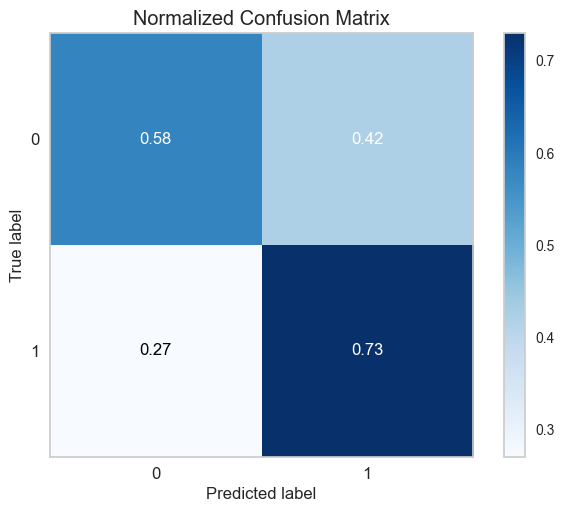

In [ ]:
# Confusion matryx
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

# References
1. https://www.risk-officer.com/Credit_Risk.htm
2. https://www.investopedia.com/terms/c/creditrisk.asp
3. https://www.investopedia.com/terms/f/five-c-credit.asp
4. https://www.sciencedirect.com/topics/economics-econometrics-and-finance/interest-rate-risk